In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [38]:
boston = pd.read_csv("boston.csv") 
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [39]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [40]:
pd.isnull(boston).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

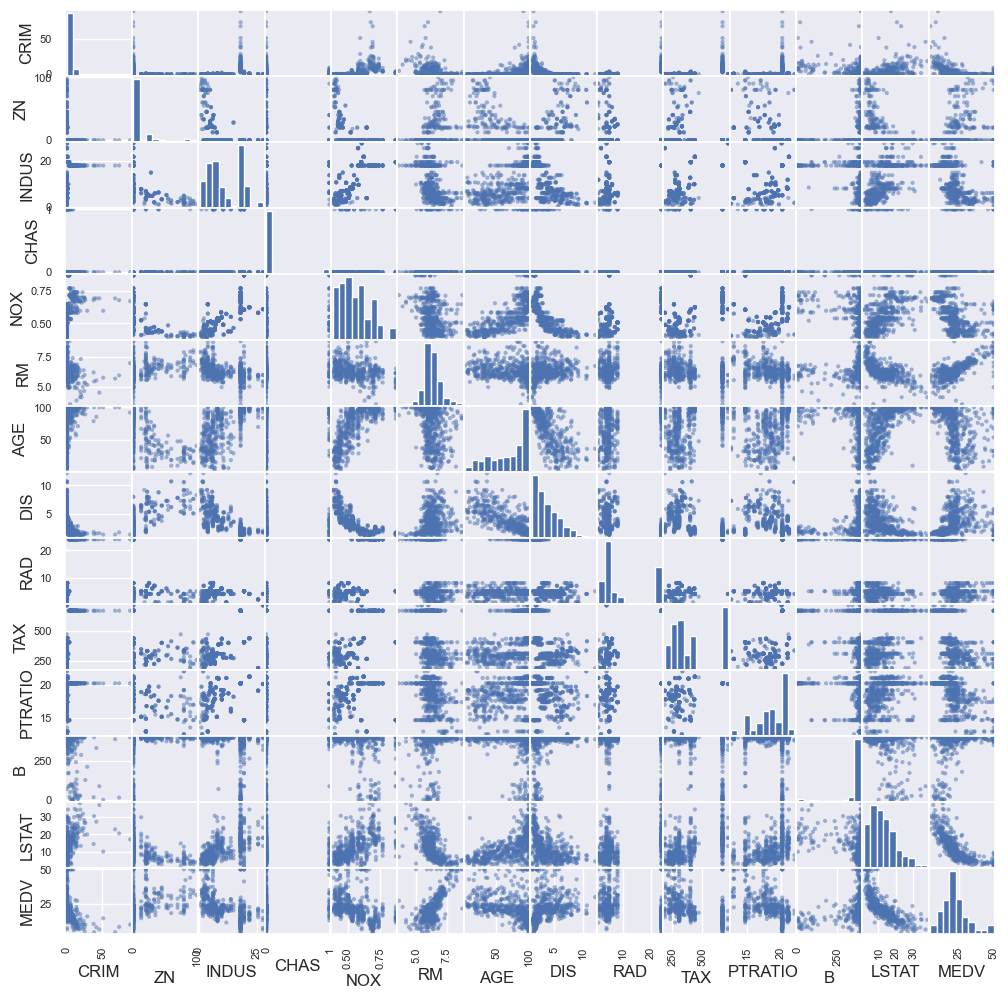

In [41]:
from pandas.plotting import scatter_matrix 
scatter_matrix(boston, figsize=(12, 12));

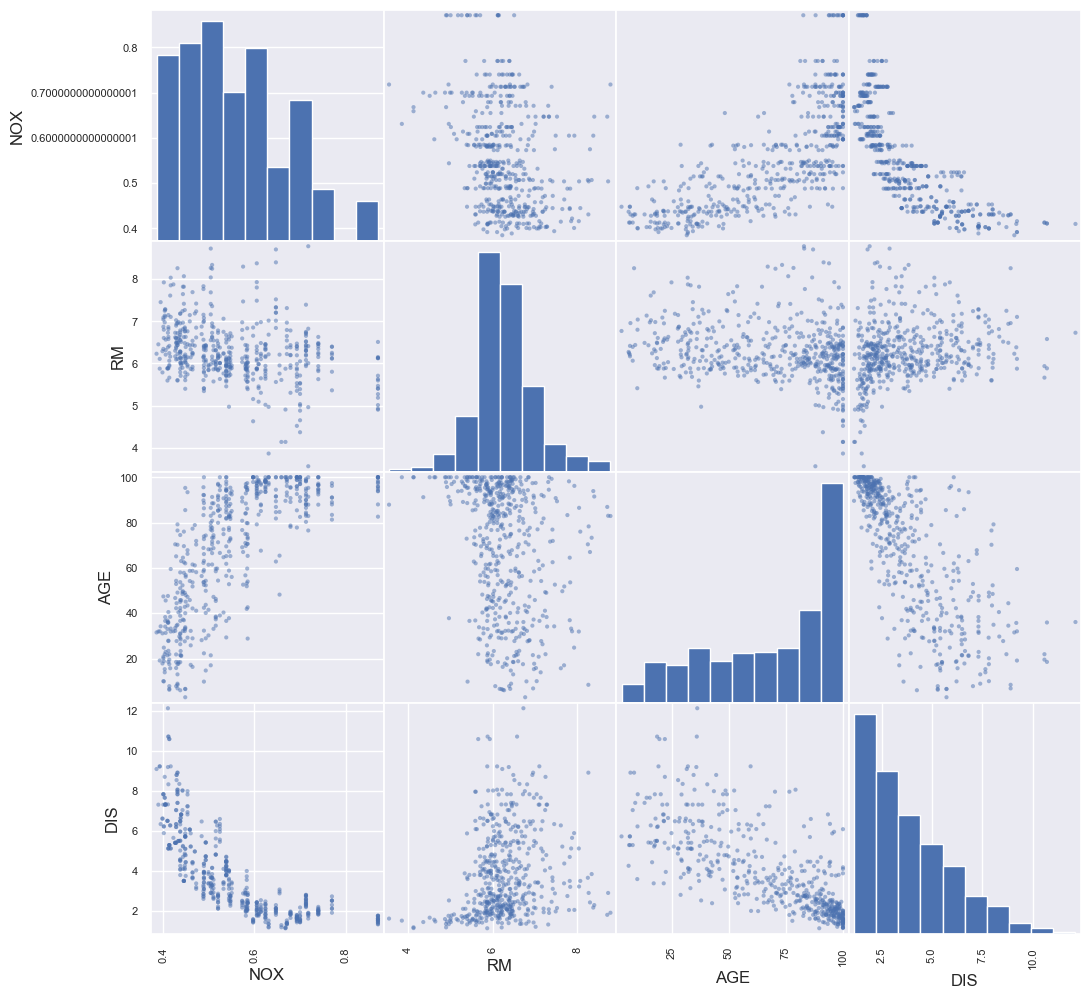

In [42]:
boston_fewer_columns=boston.iloc[:,4:8:1]
scatter_matrix(boston_fewer_columns, figsize=(12, 12));

(14.5, -0.5)

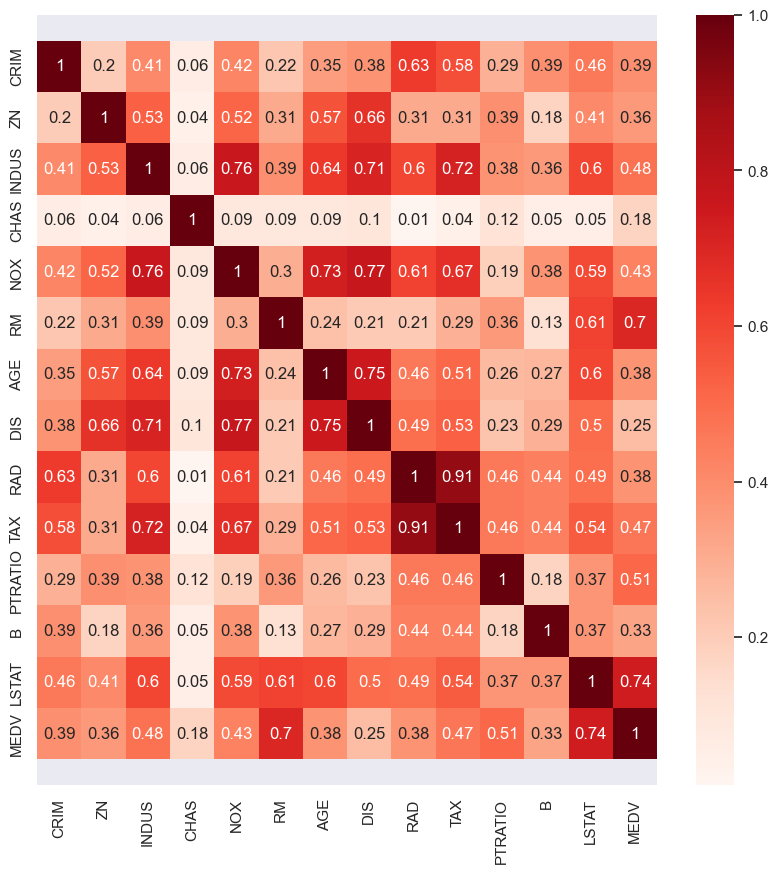

In [43]:
correlation_matrix = np.absolute(boston.corr().round(2)) 
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Reds') 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

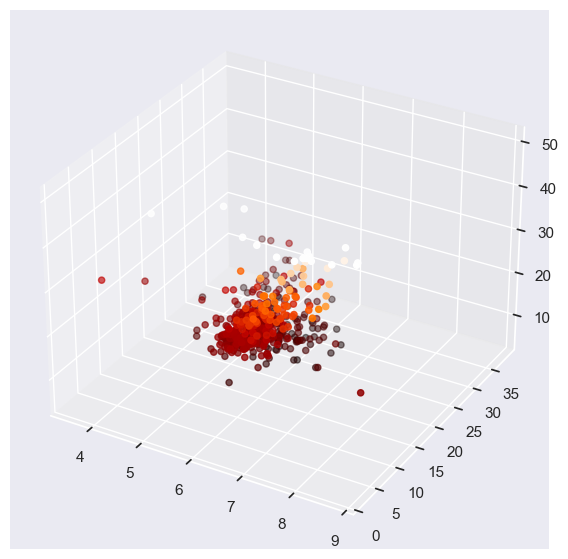

In [44]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
%matplotlib inline
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(boston['RM'],boston['LSTAT'],boston['MEDV'],c=boston['MEDV'], cmap ='gist_heat' )

In [45]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM']) 
Y = boston['MEDV']
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) 
print(X_train[0:5])

     LSTAT     RM
337  10.56  5.895
269  13.65  5.920
158   6.43  6.066
487  11.45  5.905
320   7.20  6.426


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression() 
lin_model.fit(X_train, Y_train)

LinearRegression()

In [48]:
y_train_predict = lin_model.predict(X_train)
r2_train = r2_score(Y_train, y_train_predict)
rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [49]:
y_test_predict = lin_model.predict(X_test)
r2_test = r2_score(Y_test, y_test_predict)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [50]:
print("R2:")
print("  Train = ", r2_train)
print("  Test  = ", r2_test)
print("RMSE:")
print("  Train = ", rmse_train)
print("  Test  = ", rmse_test)

R2:
  Train =  0.6138936845603684
  Test  =  0.7269179425181569
RMSE:
  Train =  5.661128016465687
  Test  =  4.946430439727175


In [51]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=3) 
X_train_poly = poly_features.fit_transform(X_train) 
print(poly_features.get_feature_names_out(["LSTAT","RM"]))

['1' 'LSTAT' 'RM' 'LSTAT^2' 'LSTAT RM' 'RM^2' 'LSTAT^3' 'LSTAT^2 RM'
 'LSTAT RM^2' 'RM^3']


In [52]:
X_train_poly[0:5]

array([[1.00000000e+00, 1.05600000e+01, 5.89500000e+00, 1.11513600e+02,
        6.22512000e+01, 3.47510250e+01, 1.17758362e+03, 6.57372672e+02,
        3.66970824e+02, 2.04857292e+02],
       [1.00000000e+00, 1.36500000e+01, 5.92000000e+00, 1.86322500e+02,
        8.08080000e+01, 3.50464000e+01, 2.54330213e+03, 1.10302920e+03,
        4.78383360e+02, 2.07474688e+02],
       [1.00000000e+00, 6.43000000e+00, 6.06600000e+00, 4.13449000e+01,
        3.90043800e+01, 3.67963560e+01, 2.65847707e+02, 2.50798163e+02,
        2.36600569e+02, 2.23206695e+02],
       [1.00000000e+00, 1.14500000e+01, 5.90500000e+00, 1.31102500e+02,
        6.76122500e+01, 3.48690250e+01, 1.50112362e+03, 7.74160262e+02,
        3.99250336e+02, 2.05901593e+02],
       [1.00000000e+00, 7.20000000e+00, 6.42600000e+00, 5.18400000e+01,
        4.62672000e+01, 4.12934760e+01, 3.73248000e+02, 3.33123840e+02,
        2.97313027e+02, 2.65351877e+02]])

In [53]:
polynomial_model = LinearRegression() 
polynomial_model.fit(X_train_poly, Y_train)
print("Model coefficients = " , polynomial_model.coef_) 
print("Constant term (bias) = ", polynomial_model.intercept_)

Model coefficients =  [ 0.00000000e+00 -1.47841532e+01 -1.29206318e+02  1.64711390e-01
  4.31348397e+00  1.75935653e+01 -6.90914706e-04 -2.08096188e-02
 -3.44651081e-01 -7.14459006e-01]
Constant term (bias) =  327.3877585081001


In [54]:
y_train_predicted = polynomial_model.predict(X_train_poly)
y_test_predict = polynomial_model.predict(poly_features.fit_transform(X_test))

In [55]:
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted)) 
r2_train = r2_score(Y_train, y_train_predicted)

rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict)) 
r2_test = r2_score(Y_test, y_test_predict)

print("R2:")
print("  Train = ", r2_train)
print("  Test  = ", r2_test)
print("RMSE:")
print("  Train = ", rmse_train)
print("  Test  = ", rmse_test)

R2:
  Train =  0.7471523236217663
  Test  =  0.8515933299227005
RMSE:
  Train =  4.581197410803792
  Test  =  3.6464648641206585
